# Customer Segmentation

### Importing libraries and dt

In [1]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot


In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means/master/cust_seg.csv")

df = df.drop(columns = ['Unnamed: 0'])
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Brief info of the data

In [3]:
display(df.shape)
display(df.info())
display(df.describe())

(850, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


None

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [4]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

## EDA

### Customers'age 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


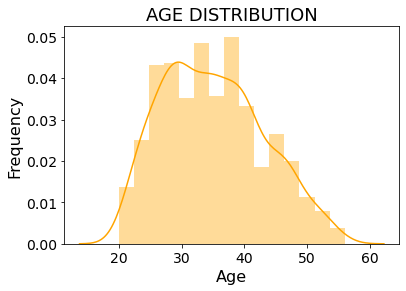

In [5]:
sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

The youngest customers were in their 20s and the oldest 56. Age is roughly normally distributed. 

### Credit card default cases

In [6]:
default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

In [7]:
print("Number of Default cases is ", len(default))
print("Number of Non-Default cases is ", len(non_default))
print('Percentage of Default cases: ', round(len(default)/len(df)*100, 1), '%')

Number of Default cases is  183
Number of Non-Default cases is  517
Percentage of Default cases:  21.5 %


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


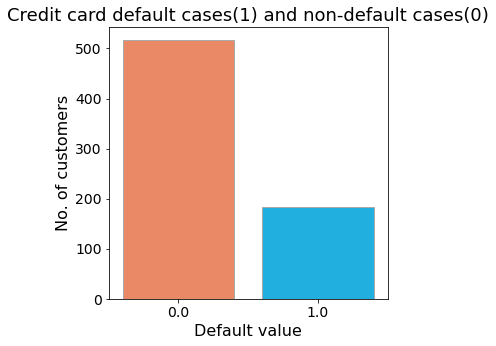

In [8]:
# Plot

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('No. of customers', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.gcf().set_size_inches(5, 5)

plt.show()

#### Income distribution

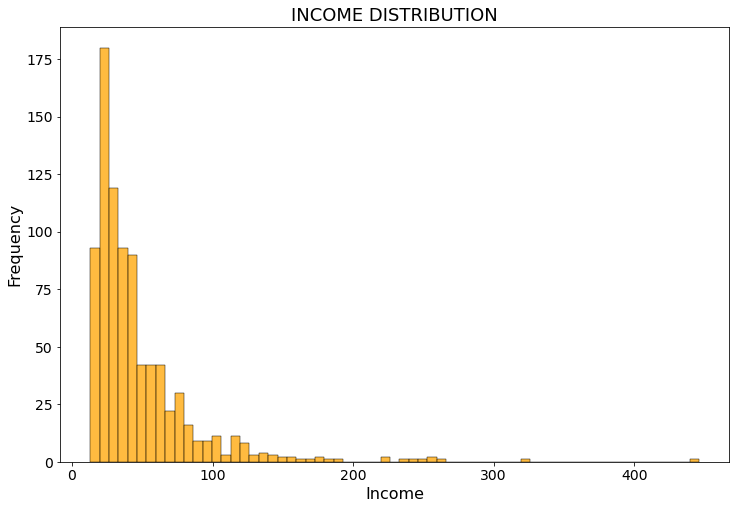

In [9]:

sb.histplot(df['Income'], 
            color = 'orange')
plt.title('INCOME DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Income', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.gcf().set_size_inches(12, 8)

plt.show()

As expected, income is highly skewed to the right. Most customers have annual income lower than 50000.

### Age vs Income

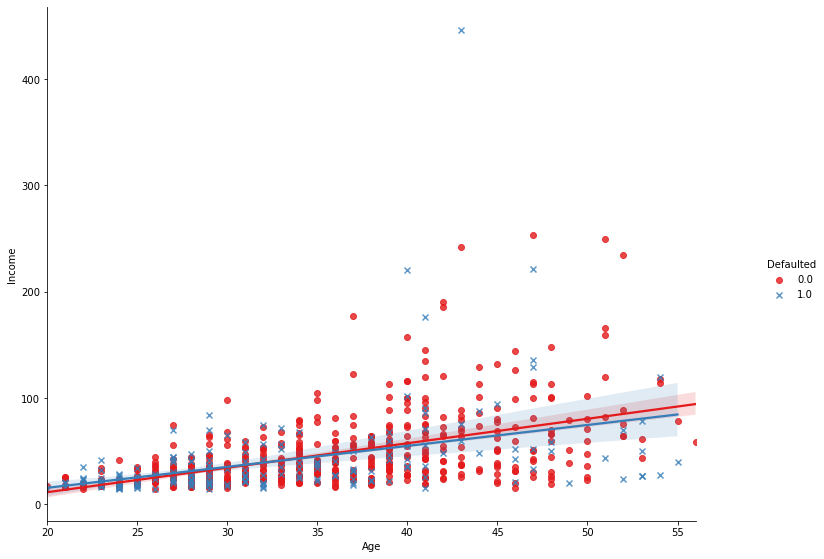

In [10]:
sb.lmplot(x="Age", y="Income", hue="Defaulted", data=df,
           markers=["o", "x"], palette="Set1")
plt.gcf().set_size_inches(12, 8)

## K-means clustering

In [14]:
# Choosing the number of cluster

# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

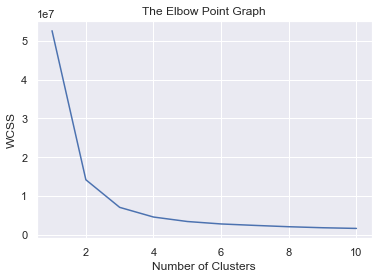

In [16]:
# plot an elbow graph
sb.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters: 3

In [15]:
# DATA PROCESSING - Normalizing the data
# We will use three attributes Age, Edu and Income as the basis for segmentation

from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Edu', 'Income']].values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cluster_data[:10])

[[ 0.74291541  0.31212243 -0.71845859]
 [ 1.48949049 -0.76634938  1.38432469]
 [-0.25251804  0.31212243  0.26803233]
 [-0.75023477  0.31212243 -0.71845859]
 [ 1.48949049 -0.76634938  5.35624866]
 [ 0.61848622 -0.76634938  0.89107923]
 [ 0.36962786  0.31212243  0.24207204]
 [ 0.86734459  1.39059423  0.44975434]
 [-1.12352231 -0.76634938 -0.74441888]
 [ 1.48949049  1.39059423  1.773729  ]]


In [16]:
# Training the k-Means Clustering Model

from sklearn.cluster import KMeans

model = KMeans(init = 'k-means++', 
               n_clusters = 3, 
               n_init = 20)

# rReturn a label for each data point based on their cluster
model.fit(X)

Y = model.labels_
print(Y)

df['cluster'] = Y

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

How many customers in each cluster?

In [22]:
df['cluster'].value_counts()

0    656
1    178
2     16
Name: cluster, dtype: int64

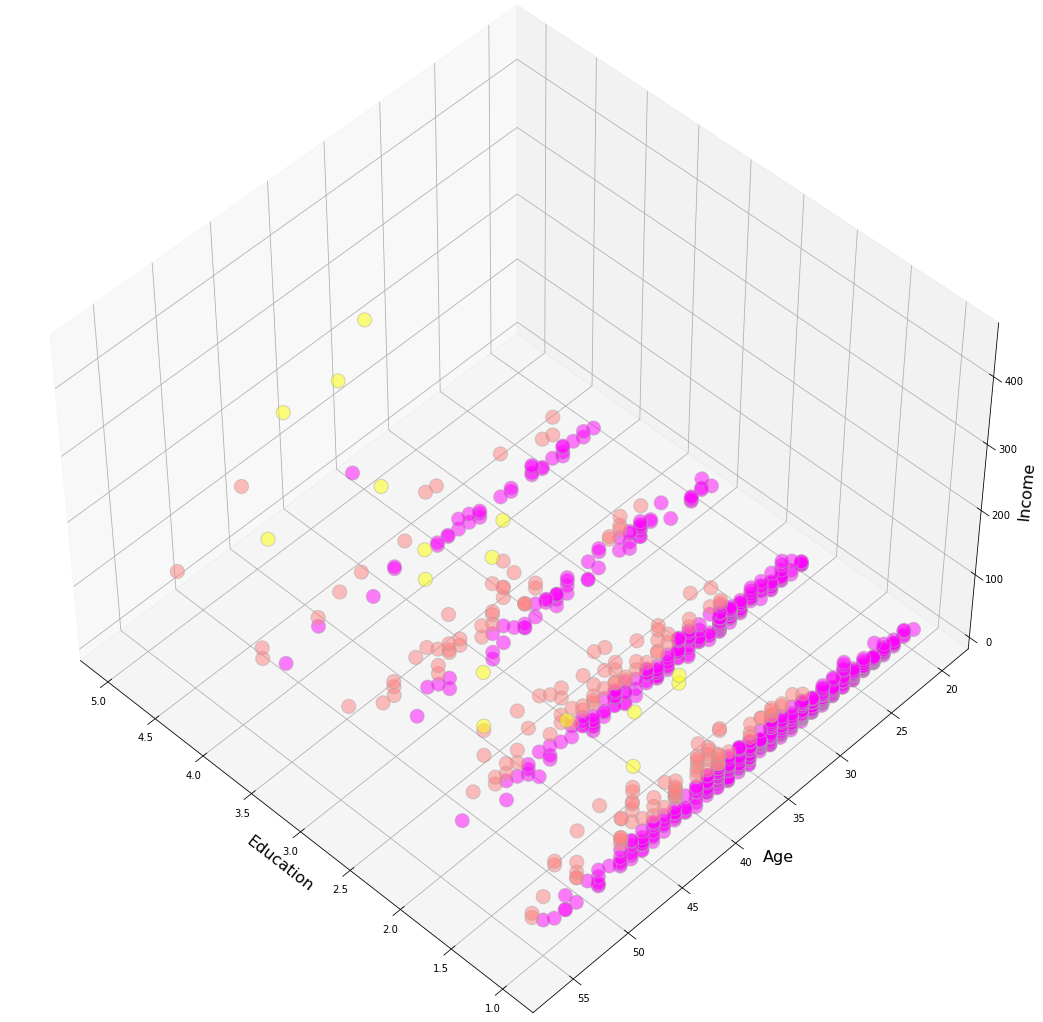

In [23]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)
plt.gcf().set_size_inches(16, 14)
plt.show()


Let us group the customers by cluster and see the mean value of each of the attributes

In [18]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,431.554878,32.989329,1.612805,6.472561,31.451220,1.049200,2.140273,0.283883,10.135976
1,403.533708,41.617978,1.983146,15.280899,85.780899,3.113506,5.769826,0.169014,10.529775
2,421.625000,45.375000,2.687500,19.687500,235.812500,6.113625,11.619313,0.333333,7.650000


Based on the statistics, we can come up with the portrait of each cluster:
Cluster 0: Low income young people 
Cluster 1: Middle-aged and middle-income
Cluster 3: Older, more educated and wealthier